In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [10]:
tc_df=pd.read_excel("Telecom_data.xlsx")

In [11]:
tc_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
tc_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
tc_df.TotalCharges = pd.to_numeric(tc_df.TotalCharges, errors='coerce')

In [14]:
tc_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
tc_df.dropna(inplace = True)
df2 = tc_df.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

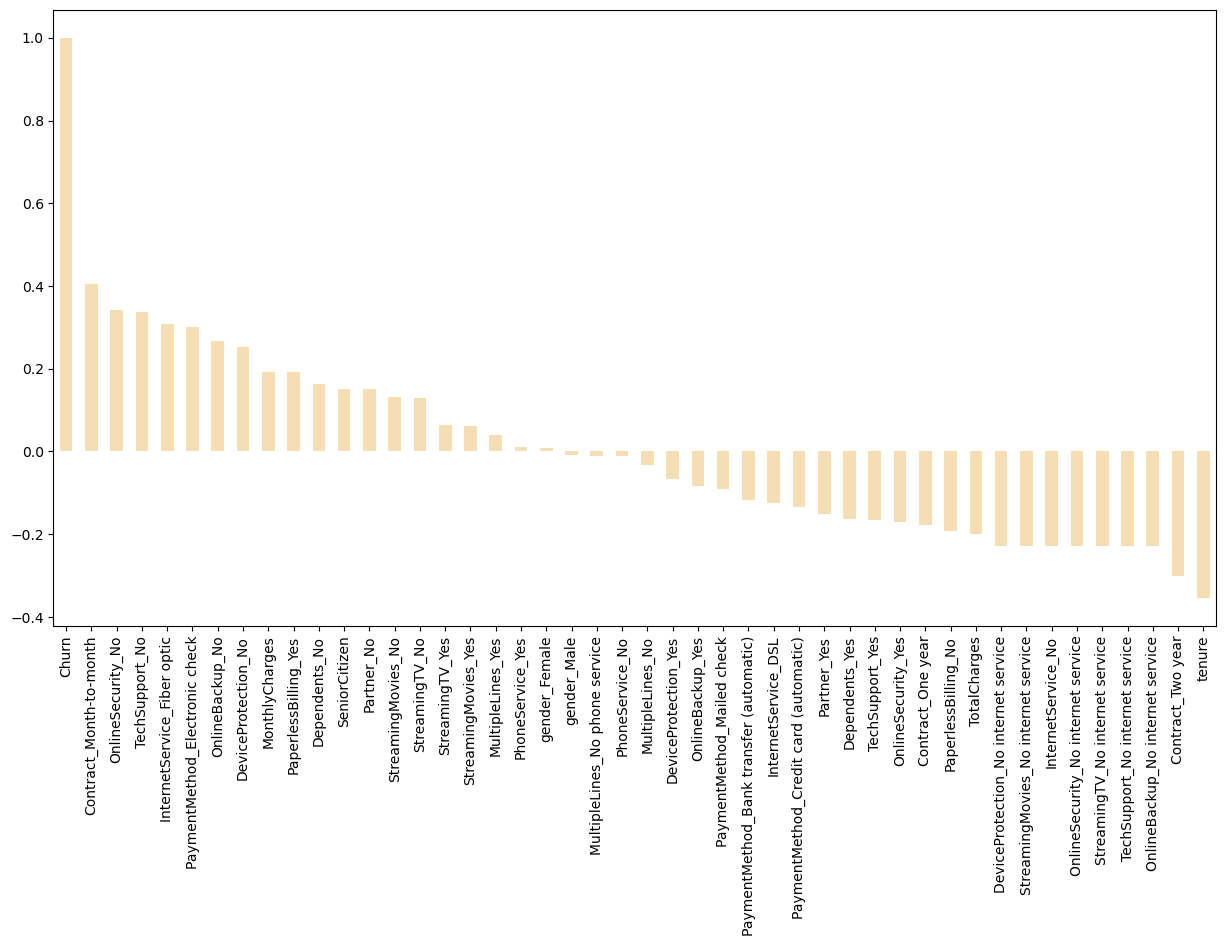

In [16]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color='wheat')

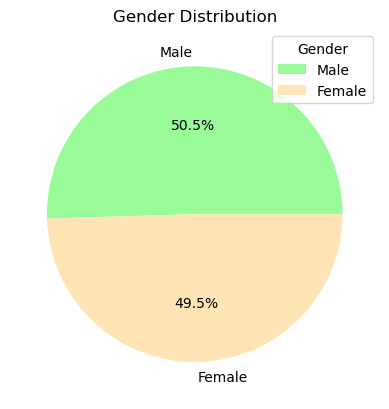

In [17]:
labels = tc_df['gender'].value_counts().index
sizes = tc_df['gender'].value_counts().values
colors = ['palegreen', 'moccasin']
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors)
ax.set_title('Gender Distribution')
ax.legend(title='Gender')
plt.show()

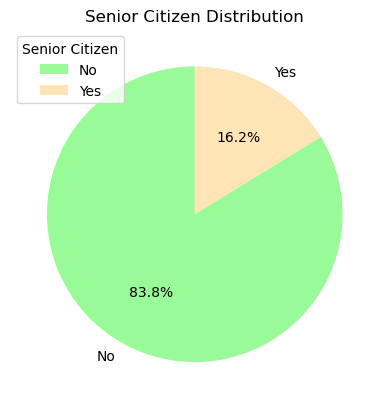

In [18]:
colors = ['palegreen', 'moccasin']

# Create the pie chart
labels = ['No', 'Yes']
sizes = tc_df['SeniorCitizen'].value_counts().values
fig, ax = plt.subplots()
pie = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Set the title and legend
ax.set_title('Senior Citizen Distribution')
ax.legend(title='Senior Citizen')

plt.show()

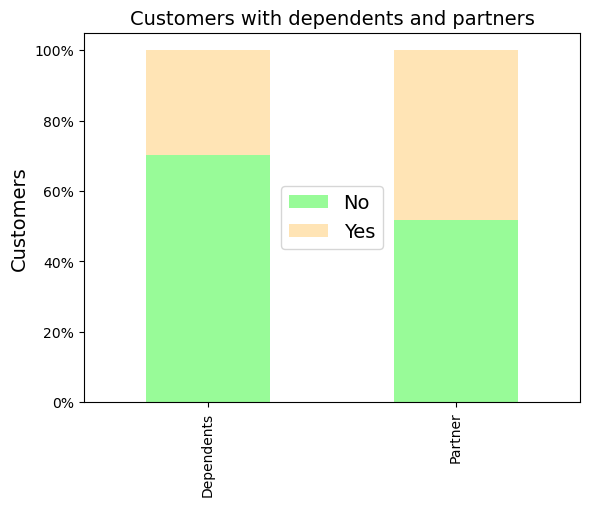

In [19]:
colors = ['palegreen', 'moccasin', 'dodgerblue']
df2 = pd.melt(tc_df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(tc_df)
ax = df3.loc[:,'customerID'].plot.bar(stacked=True,color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

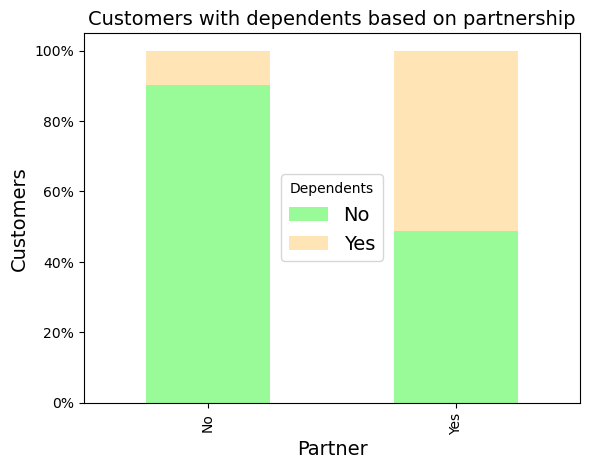

In [20]:
colors = ['palegreen', 'moccasin', 'dodgerblue']
partner_dependents = tc_df.groupby(['Partner','Dependents']).size().unstack()
ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',stacked = True,color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('Customers',size = 14)
ax.set_title('Customers with dependents based on partnership',size = 14)
ax.xaxis.label.set_size(14)

Text(0.5, 0.98, 'Customers - tenure')

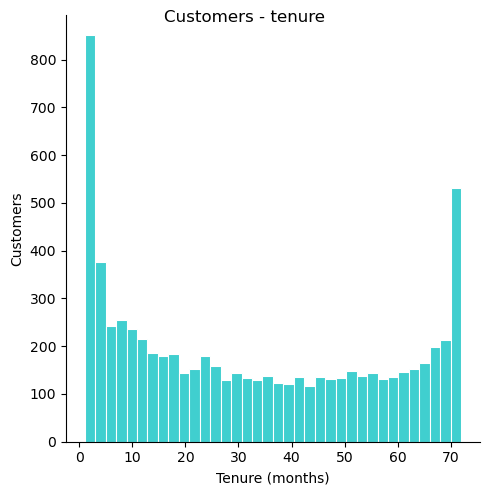

In [21]:
ax = sns.displot(tc_df['tenure'], kde=False, bins=int(180/5),color='c', edgecolor='white')
ax.set_axis_labels('Tenure (months)', 'Customers')
ax.fig.suptitle('Customers - tenure')

Text(0.5, 1.0, 'Customers - Contract Type')

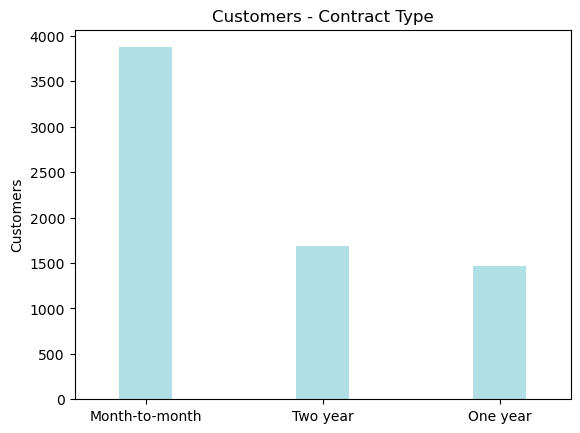

In [22]:
ax = tc_df['Contract'].value_counts().plot(kind = 'bar',rot = 0,color='powderblue', width = 0.3)
ax.set_ylabel('Customers')
ax.set_title('Customers - Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

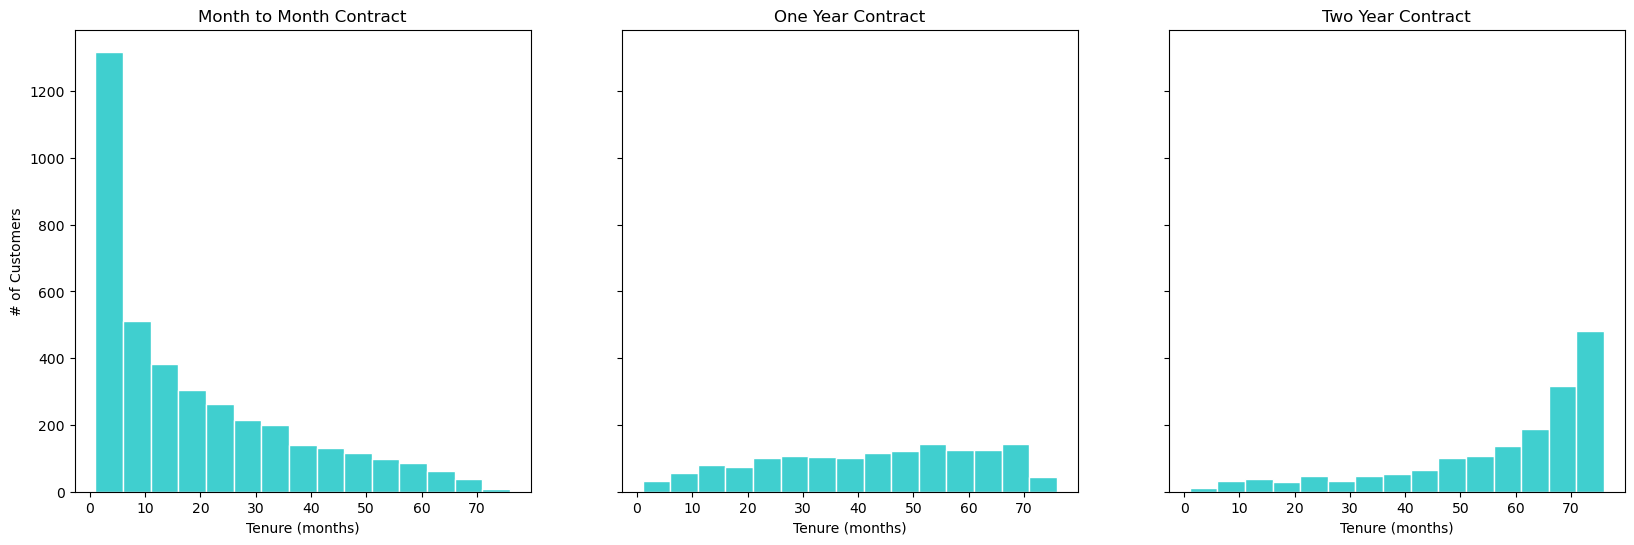

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

sns.histplot(data=tc_df[tc_df['Contract']=='Month-to-month'], x='tenure', binwidth=5, kde=False, edgecolor='white', color='c', ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

sns.histplot(data=tc_df[tc_df['Contract']=='One year'], x='tenure', binwidth=5, kde=False, edgecolor='white', color='c', ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

sns.histplot(data=tc_df[tc_df['Contract']=='Two year'], x='tenure', binwidth=5, kde=False, edgecolor='white', color='c', ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

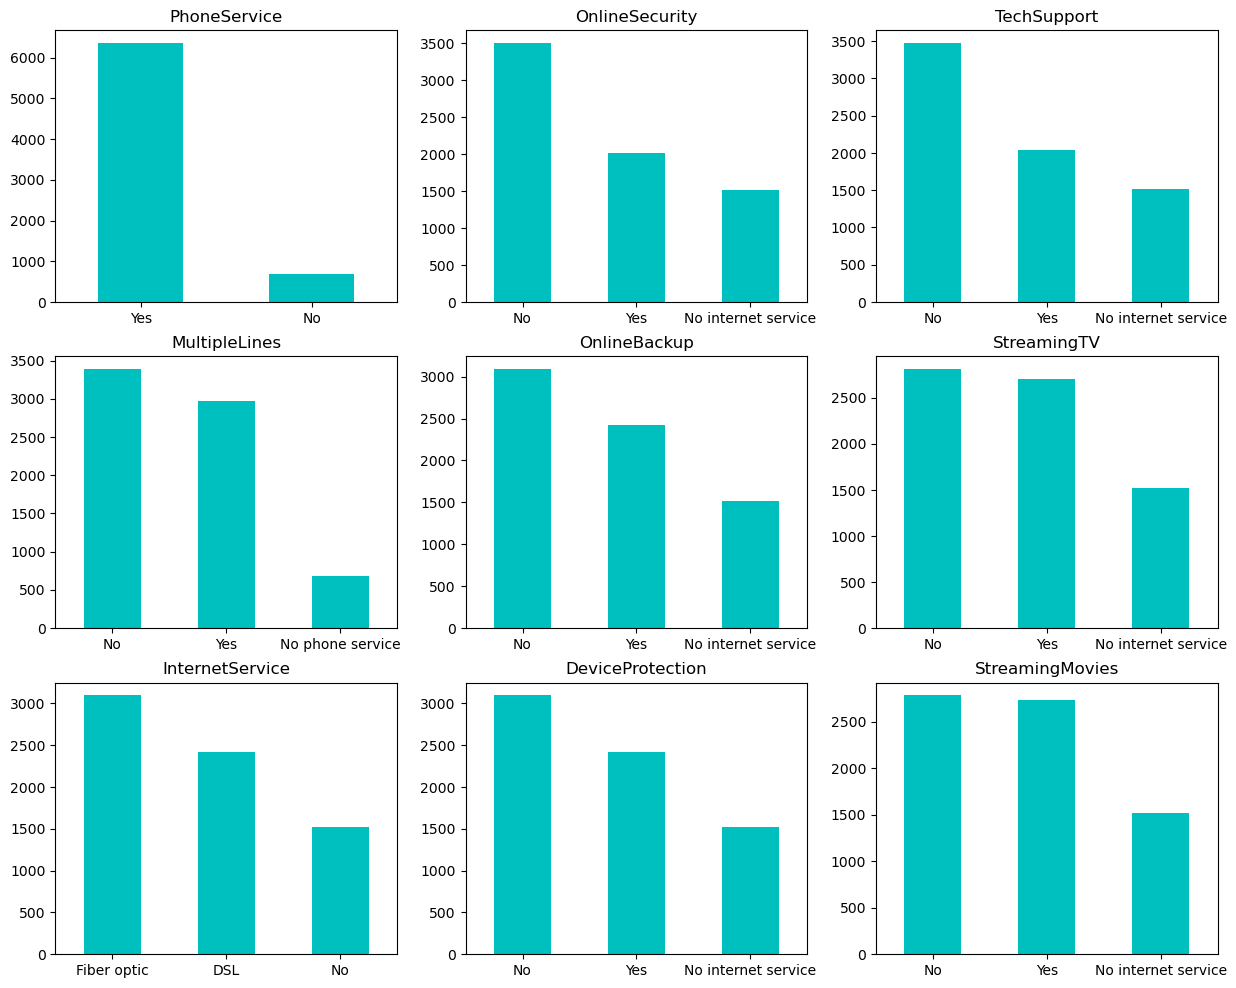

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = tc_df[item].value_counts().plot(kind = 'bar',color='c',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = tc_df[item].value_counts().plot(kind = 'bar',color='c',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = tc_df[item].value_counts().plot(kind = 'bar',color='c',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

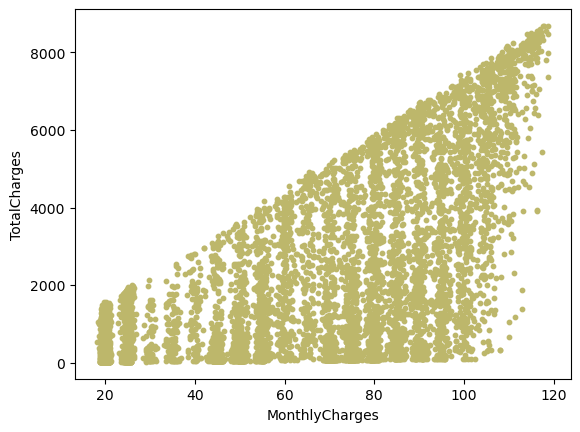

In [25]:
tc_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges',s=10,color='darkkhaki')

Text(0.5, 1.0, 'Churn Rate')

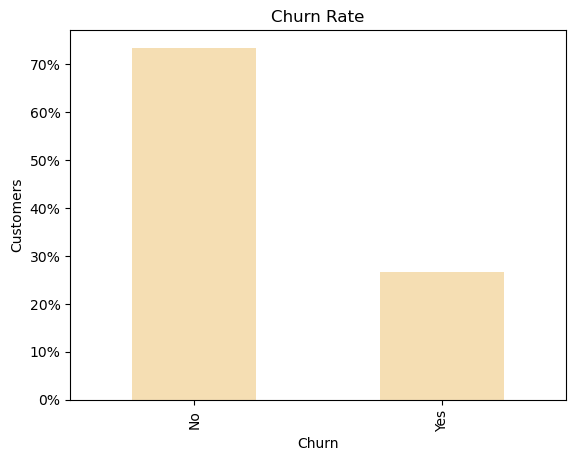

In [26]:
ax = (tc_df['Churn'].value_counts()*100.0 /len(tc_df)).plot(kind='bar',stacked = True,color='wheat')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

Text(0.5, 1.0, 'Churn by Contract Type')

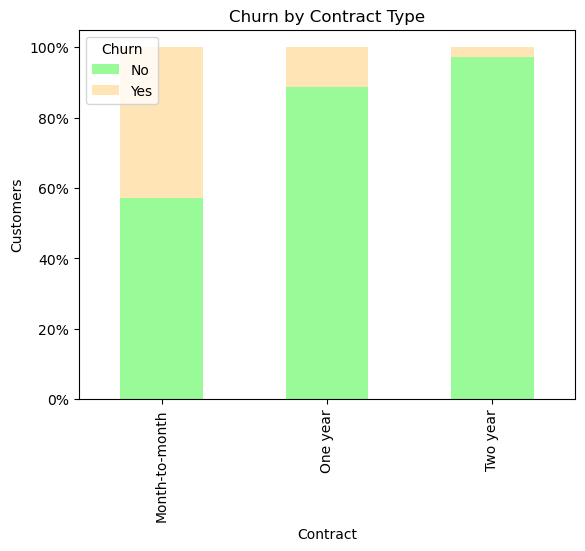

In [27]:
colors = ['palegreen', 'moccasin', 'dodgerblue']
contract_churn = tc_df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',stacked = True,color=colors)
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(title = 'Churn')
ax.set_ylabel('Customers')
ax.set_title('Churn by Contract Type')

Text(0.5, 1.0, 'Churn by Seniority Level')

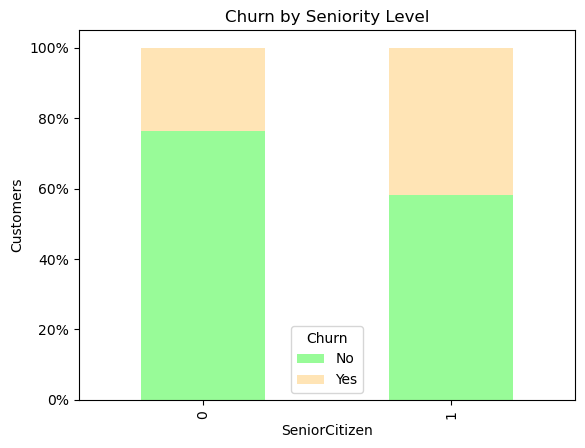

In [28]:
colors = ['palegreen', 'moccasin', 'dodgerblue']
seniority_churn = tc_df.groupby(['SeniorCitizen','Churn']).size().unstack()
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',stacked = True,color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(title = 'Churn')
ax.set_ylabel('Customers')
ax.set_title('Churn by Seniority Level')

Text(0.5, 1.0, 'Distribution of total charges by churn')

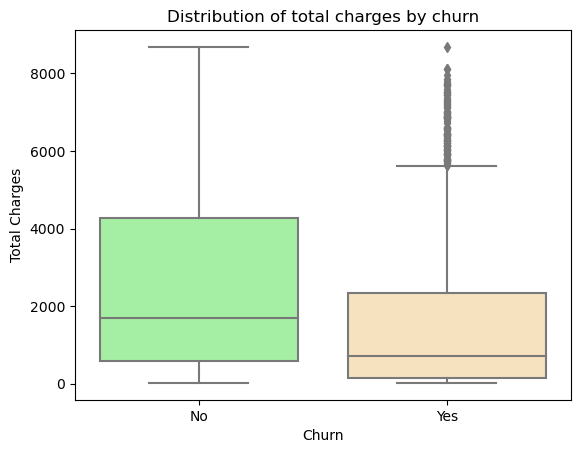

In [29]:
ax = sns.boxplot(x="Churn", y="TotalCharges", data=tc_df, palette=["palegreen", "moccasin"])
ax.set_xlabel('Churn')
ax.set_ylabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [30]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [33]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.11;0.775x0.77)


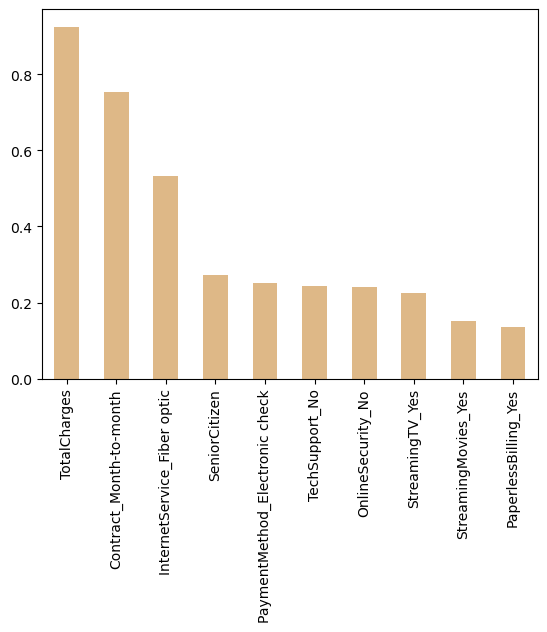

In [34]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar',color='burlywood'))

AxesSubplot(0.125,0.11;0.775x0.77)


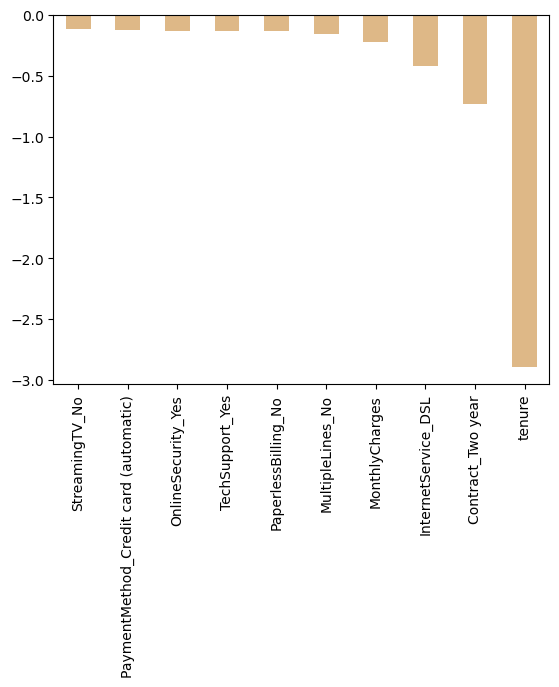

In [35]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color='burlywood'))

In [37]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1,
                                   random_state=50, max_features="sqrt",
                                   max_leaf_nodes=30)

model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939
